#**KLASIFIKASI DATA KUALITAS AIR dan KELAYAKAN MINUM**

__Tulis Nama dan Nim__

Nama : Harmiaji Bagas Satyatma Sitepu

NIM : A11.2021.13421

Silahkan buat salinan ke Drive sendiri

`File -> Save copy in drive`

Dalam project kali ini kita akan melakukan klasifikasi menggunakan dataset water potability

Berikut Link Dataset :  https://drive.google.com/file/d/1uBQmeOucB1xIg1n0MdgBwCoi3ZJrHZpN/view?usp=drive_link

## **Data Preprocessing**

### 1). Pengumpulan Data

In [1]:
# Import lib yang perlu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Baca dataset code-cell berikut
water_potability_df = pd.read_csv('https://drive.google.com/uc?id=1Nhz5LbYIHC0NTYRAHUvoTf_CF7HFoz_S')

In [3]:
water_potability_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_potability_df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


### 2). Menelaah Data

In [5]:
# Cek info setiap kolom
water_potability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
water_potability_df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [7]:
water_potability_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
water_potability_df.shape

(3276, 10)

In [9]:
# Cek nilai unik dari setiap kolom
water_potability_df.select_dtypes(include=['float64','int64']).nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


### 3). Validasi Data dan Visualisasi Data

In [10]:
# Tampilkan data yang kosong
water_potability_df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [11]:
# Cek duplikat
water_potability_df.duplicated().sum()

0

In [12]:
# Memisahkan fitur numerik
numerical_features = water_potability_df.select_dtypes(include=['int64', 'float64']).columns

In [13]:
def plot_histograms(dataframe, numeric_columns):
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Create subplots with enough rows

    for i, col in enumerate(numeric_columns):
        row = i // 3
        col_num = i % 3
        sns.histplot(dataframe[col], ax=axes[row, col_num], bins=20, color='blue', kde=True)
        axes[row, col_num].set_title(f'Distribusi {col}', fontsize=16)
        axes[row, col_num].set_xlabel(col)
        axes[row, col_num].set_ylabel('Frekuensi')

    # Remove empty subplots if any
    for i in range(len(numeric_columns), num_rows * 3):
        row = i // 3
        col_num = i % 3
        fig.delaxes(axes[row, col_num])

    plt.tight_layout()
    plt.show()

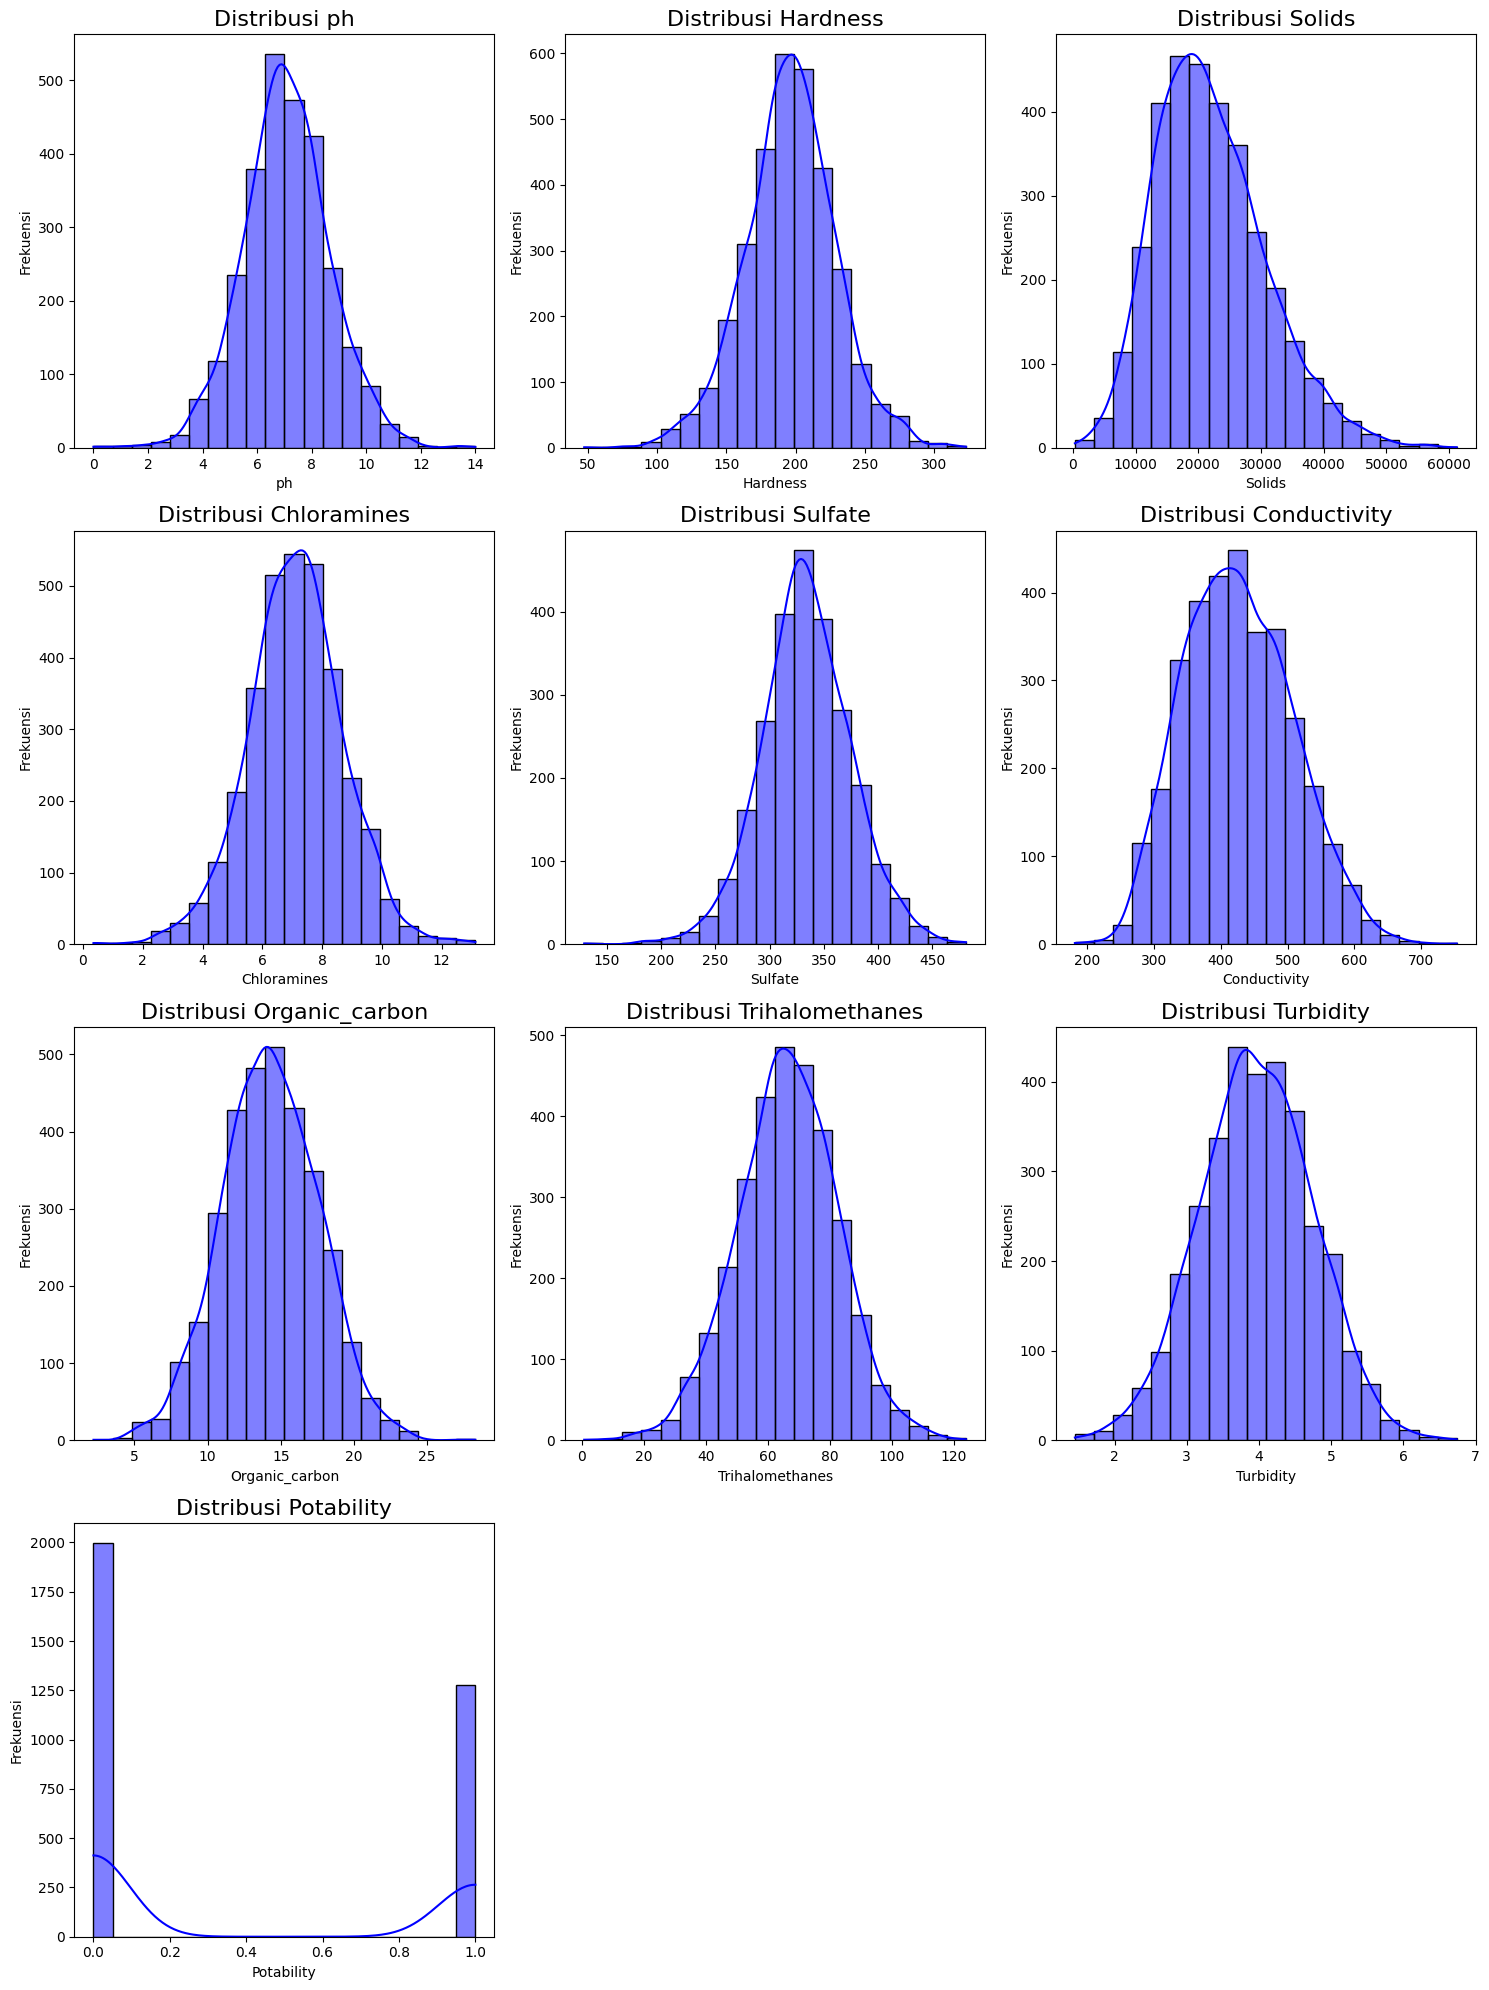

In [14]:
plot_histograms(water_potability_df, numerical_features)

### 4). Menentukan Object Data

In [15]:
water_potability_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
water_potability_df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [17]:
water_potability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### 5). Membersihkan Data

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
water_potability_df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [20]:
imputer = SimpleImputer(strategy='mean')
water_potability_df[numerical_features] = imputer.fit_transform(water_potability_df[numerical_features])

In [21]:
water_potability_df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [22]:
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust for 2 columns per row
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))  # Adjusted figsize

    # Handle single plot case
    if num_plots == 1:
        axes = [axes]

    for i, column in enumerate(numeric_columns):
        row = i // 2  # 2 plots per row
        col = i % 2
        sns.boxplot(y=dataframe[column], ax=axes[row] if num_plots == 1 else axes[row, col])
        (axes[row] if num_plots == 1 else axes[row, col]).set_title(f'Boxplot of {column}')
        (axes[row] if num_plots == 1 else axes[row, col]).set_ylabel(column)

    # Remove empty subplots (if any)
    if num_plots > 1 and num_plots % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.tight_layout()
    plt.show()

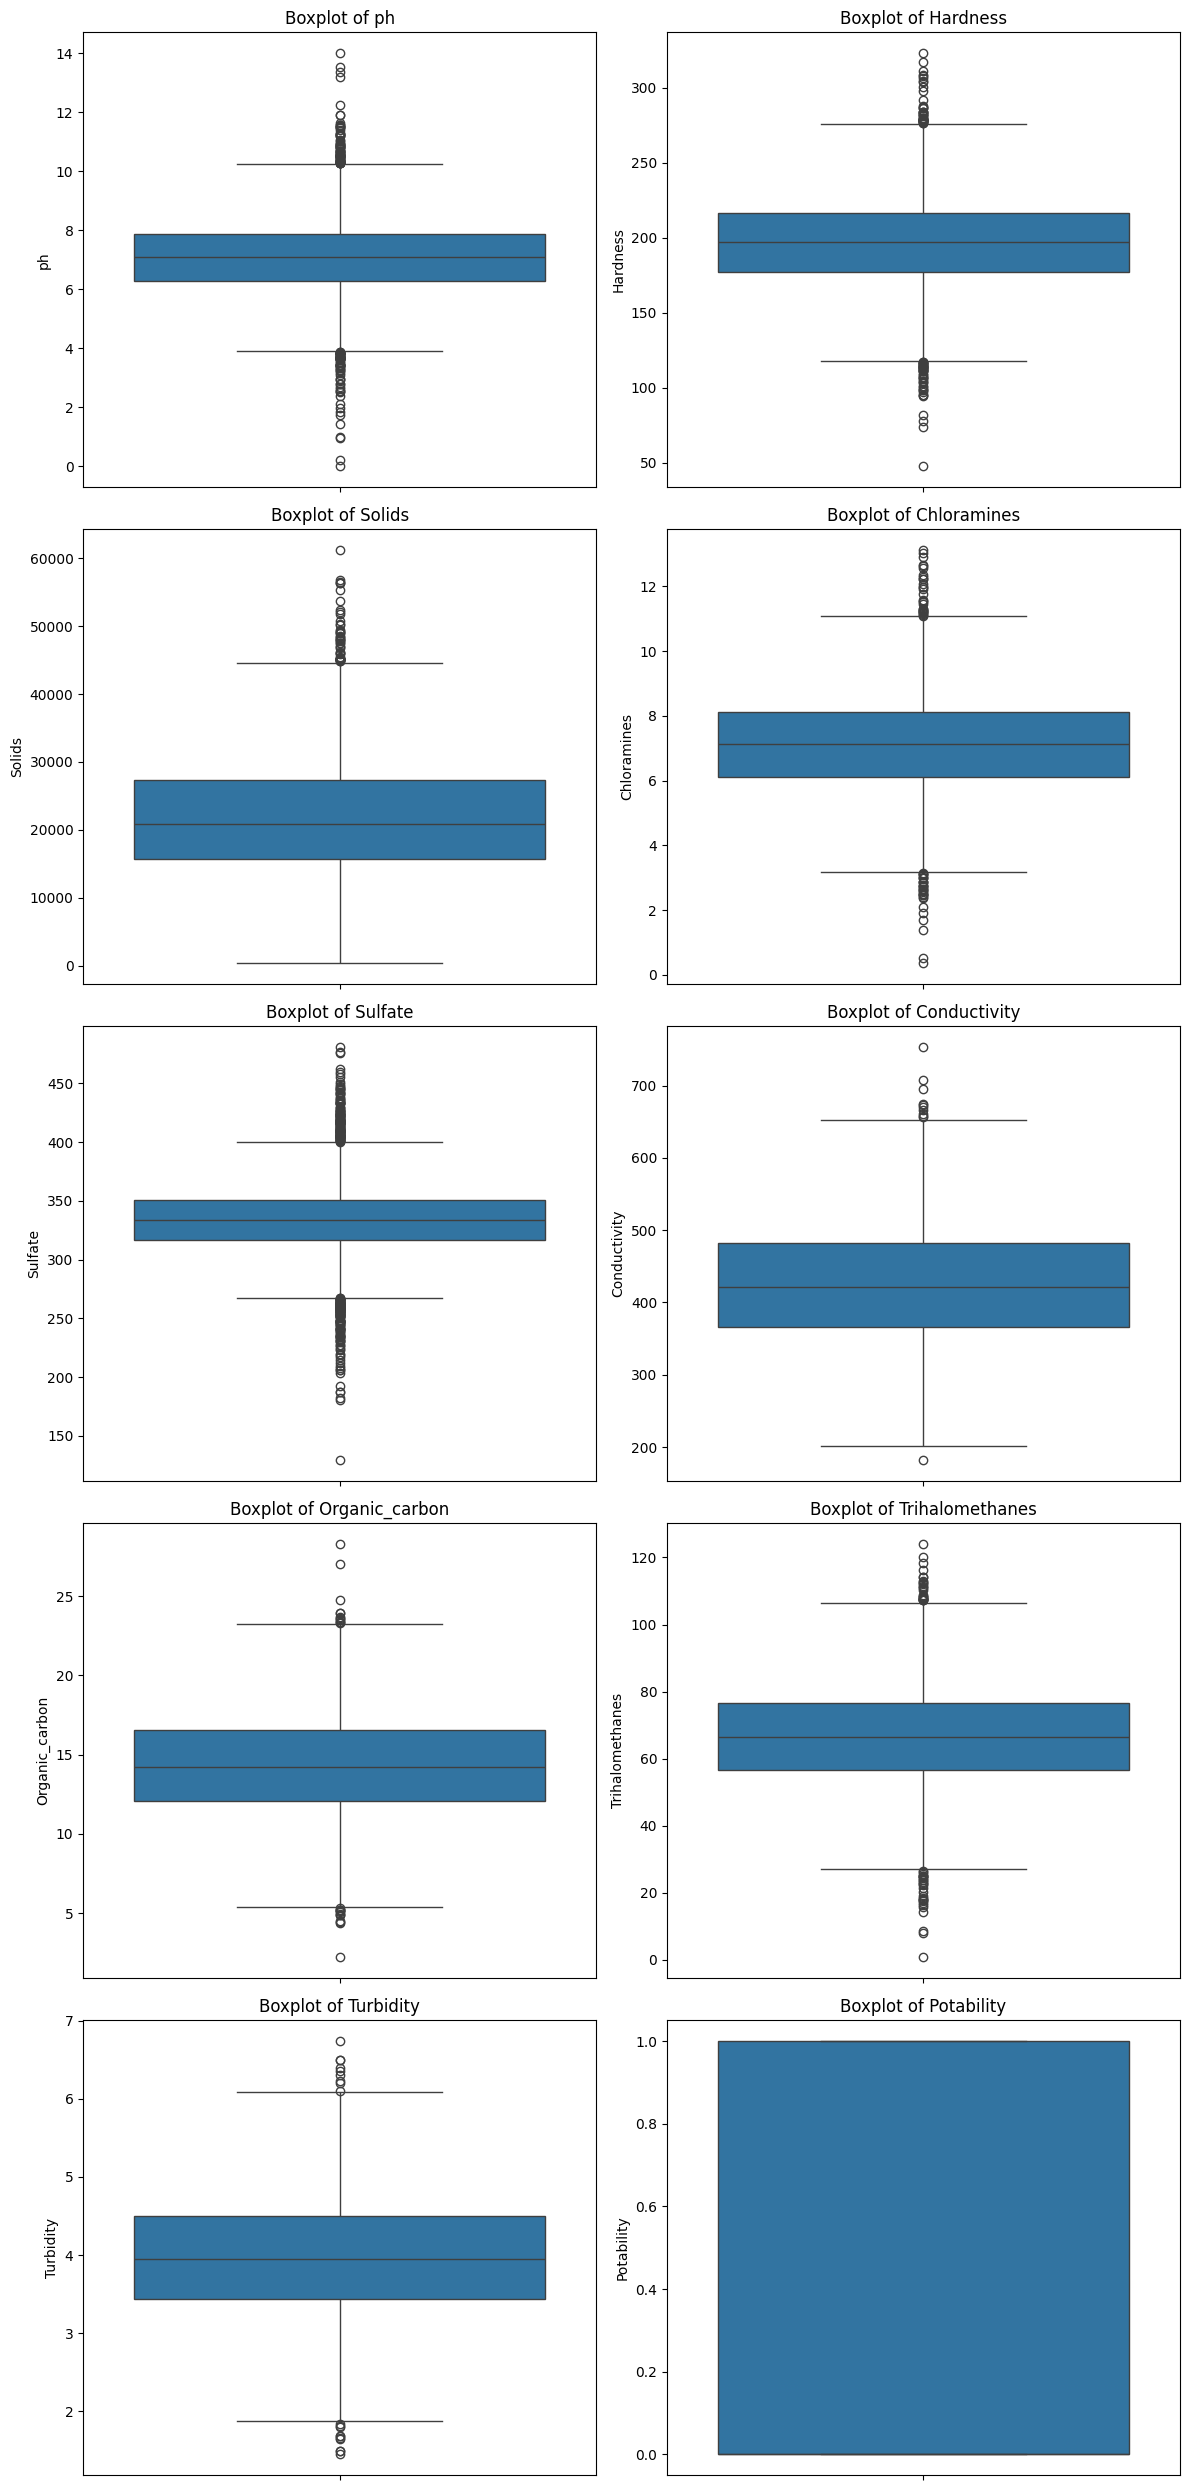

In [23]:
boxplot(water_potability_df, numerical_features)

In [24]:
data_iqr = water_potability_df.copy()
for column in water_potability_df.select_dtypes(include=np.number).columns:
    Q1 = water_potability_df[column].quantile(0.25)
    Q3 = water_potability_df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Ganti outlier dengan rata-rata kolom
    mean_value = water_potability_df[column].mean()
    data_iqr[column] = np.where(
        (water_potability_df[column] > upper_bound) | (water_potability_df[column] < lower_bound),
        mean_value, data_iqr[column]
    )

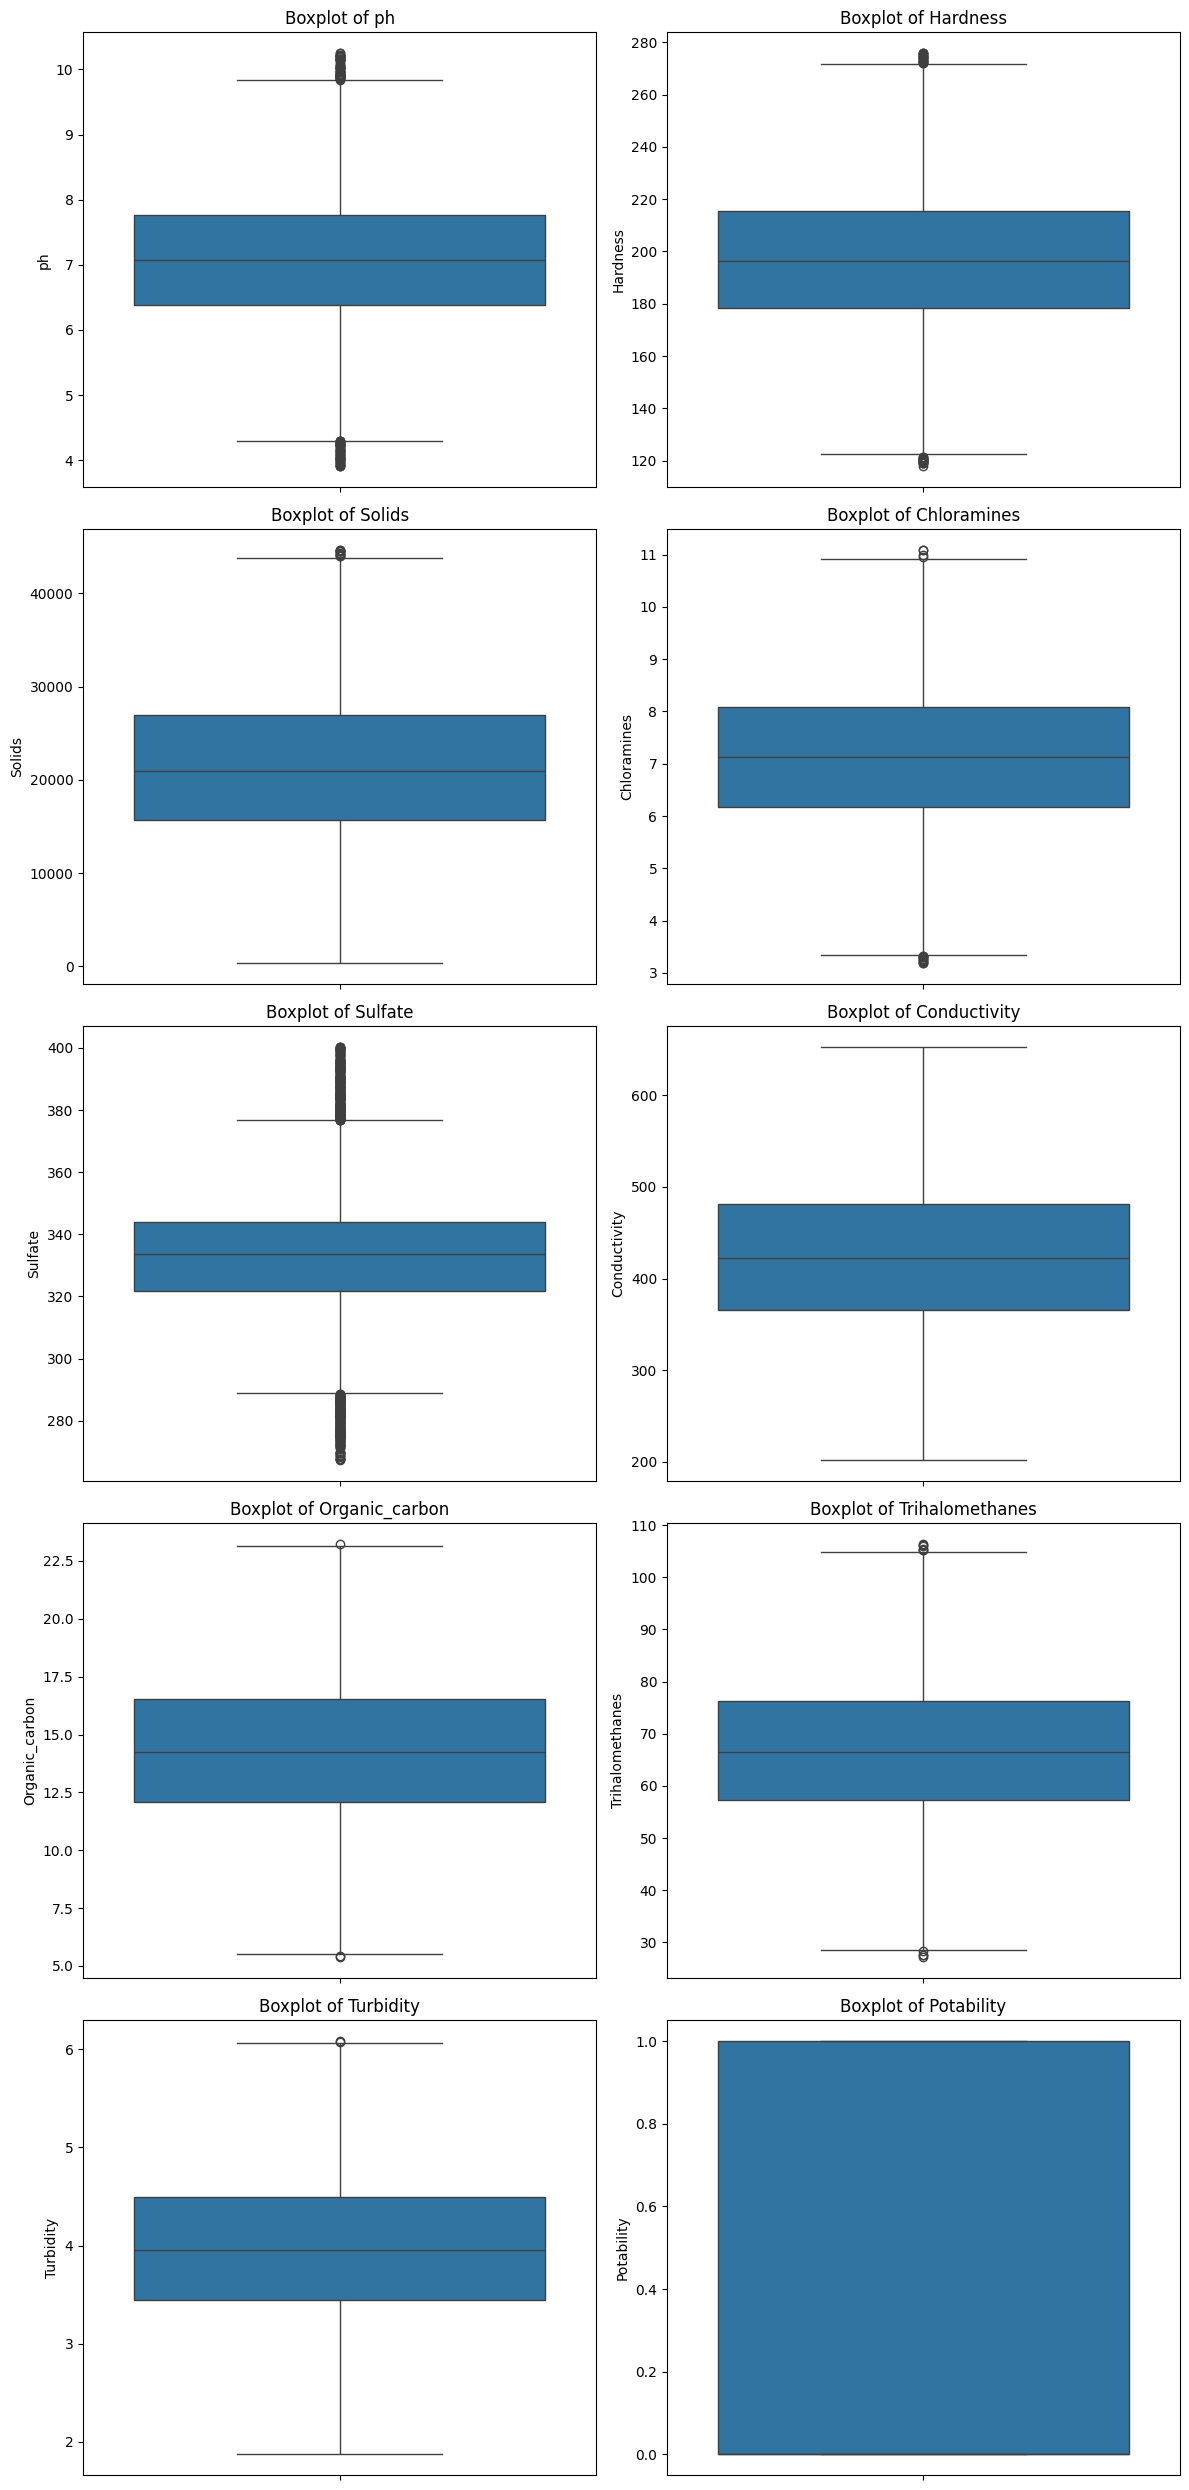

In [25]:
# prompt: buatkan boxplot setelah menangani outlier
boxplot(data_iqr, numerical_features)

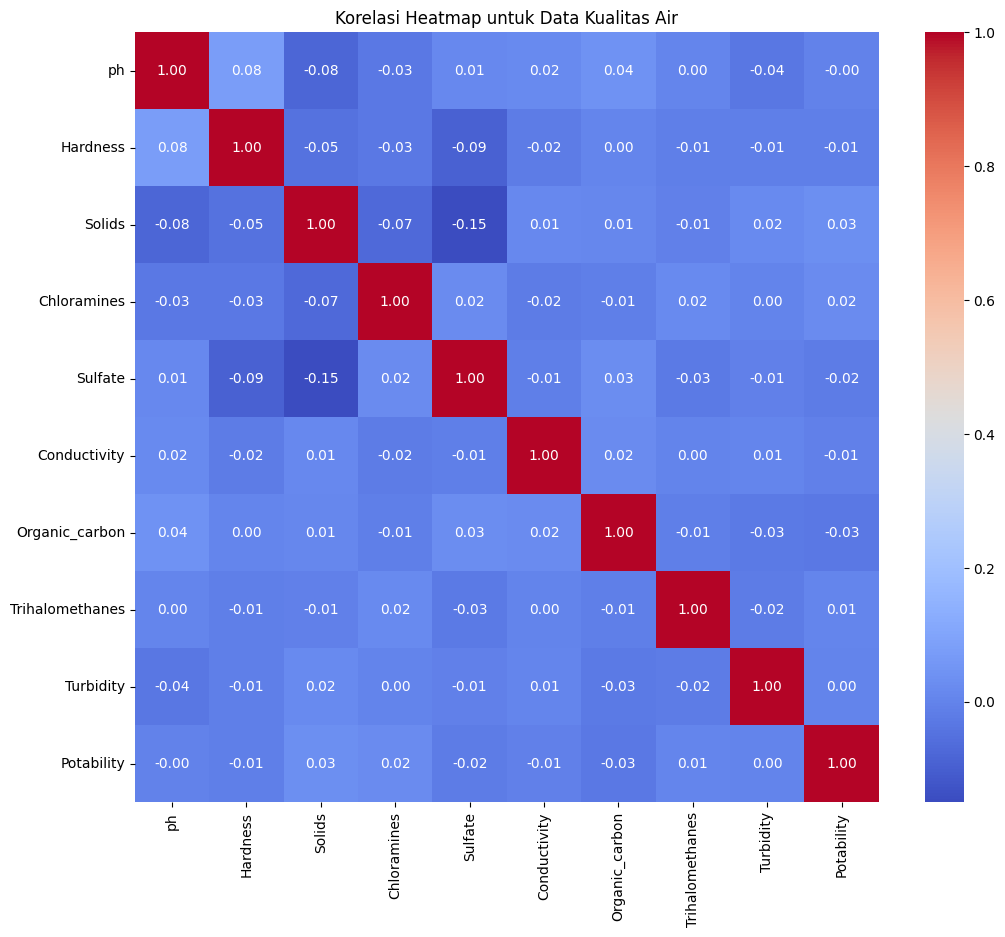

In [26]:
# Hitung matriks korelasi
corr_matrix = water_potability_df.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))  # Atur ukuran figure jika diperlukan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Heatmap untuk Data Kualitas Air')
plt.show()

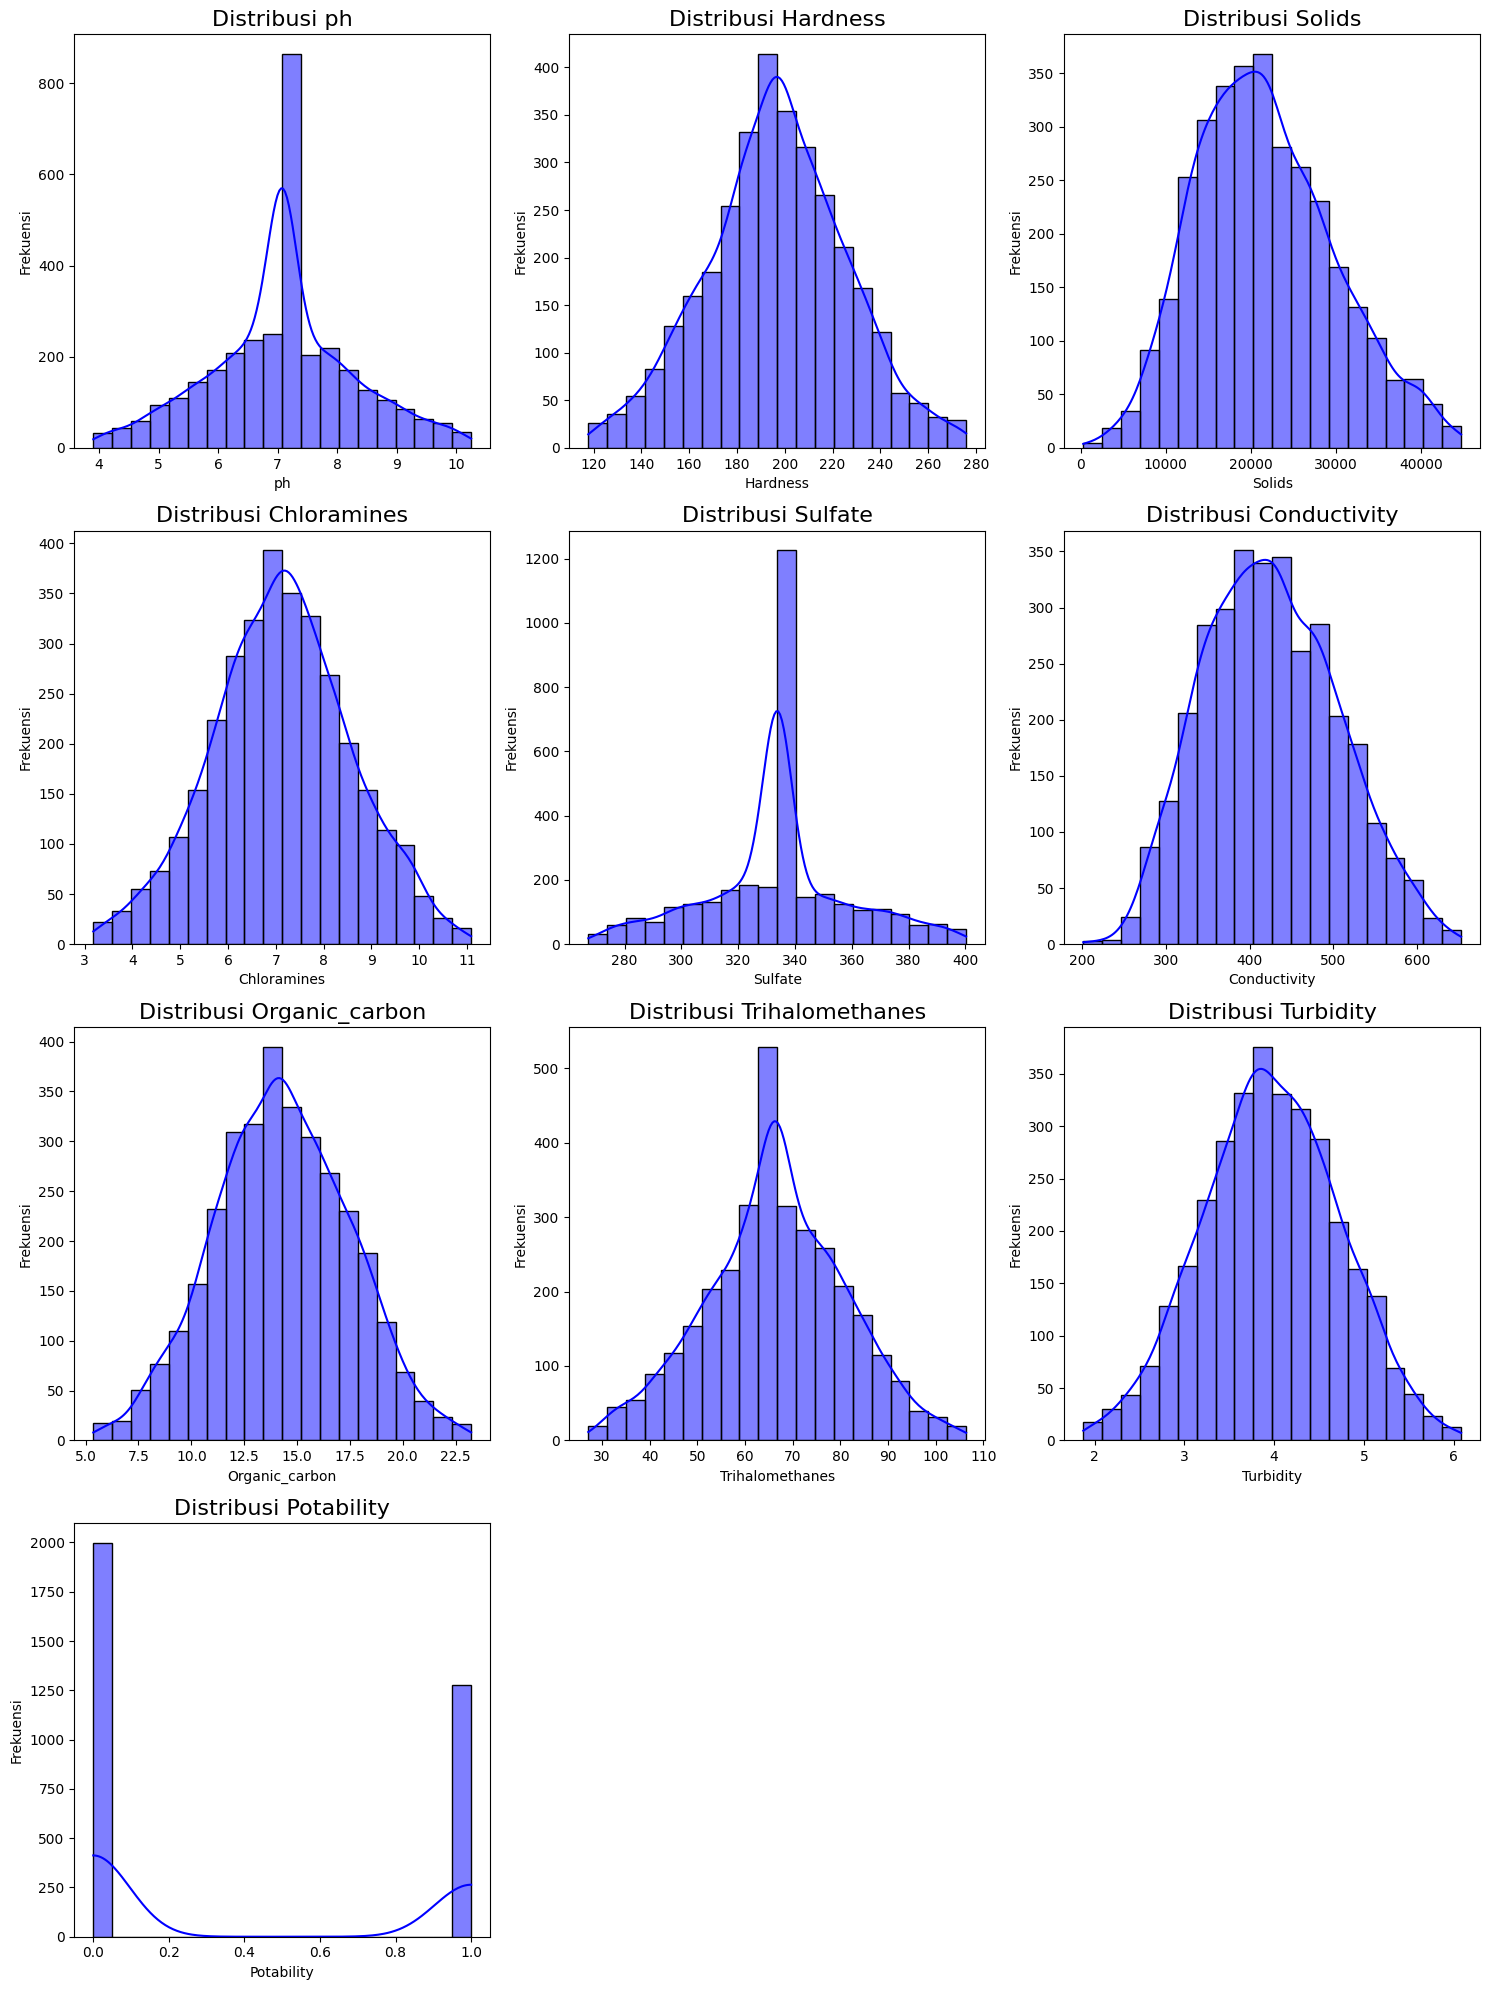

In [27]:
plot_histograms(data_iqr, numerical_features)

### 6). Konstruksi Data

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [28]:
data_iqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


In [29]:
data_iqr.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.072472,1.212457,3.902476,6.376857,7.080795,7.762369,10.252816
Hardness,3276.0,196.504096,29.401643,117.791230,178.222090,196.369496,215.593162,275.886513
Solids,3276.0,21629.750926,8137.573905,320.942611,15666.690297,20927.833607,26957.576932,44652.363872
Chloramines,3276.0,7.123028,1.445694,3.181183,6.179765,7.122277,8.076082,11.086526
Sulfate,3276.0,333.669599,25.531172,267.202392,321.856816,333.775777,343.827461,400.274579
Conductivity,3276.0,425.500492,79.449493,201.619737,365.811312,421.926811,480.855683,652.537592
Organic_carbon,3276.0,14.286000,3.193339,5.362371,12.094010,14.246387,16.517104,23.234326
Trihalomethanes,3276.0,66.465014,14.609593,27.095703,57.201524,66.396293,76.336831,106.371720
Turbidity,3276.0,3.967241,0.759414,1.872573,3.444882,3.959577,4.494481,6.083772
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [30]:
data_iqr.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,7.080795,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


### 7). Permodelan

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data_iqr.drop("Potability", axis = 1)
y = data_iqr["Potability"]

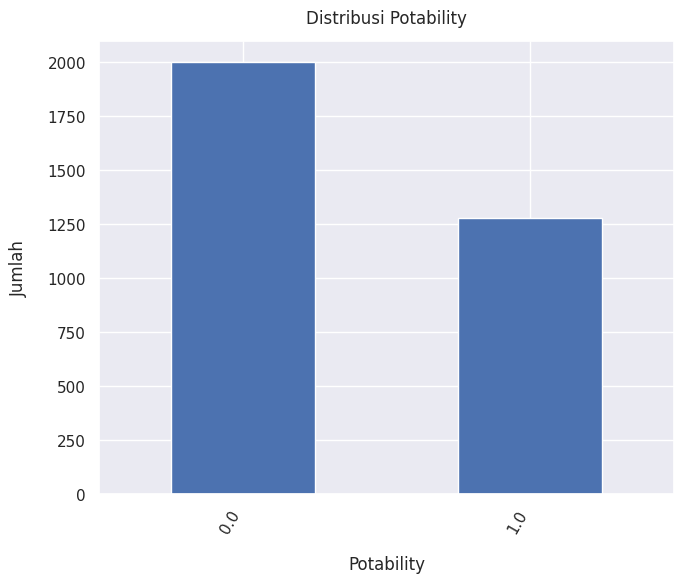

In [33]:
sns.set(font_scale=1.0)
data_iqr['Potability'].value_counts().plot(kind='bar', figsize=(7, 6), width=0.5)
plt.xlabel("Potability", labelpad=14)
plt.xticks(rotation=60, ha='right')
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Potability", y=1.02)
plt.tight_layout();

In [34]:
from imblearn.over_sampling import SMOTE # Library untuk membantu oversampling dengan teknik SMOTE

In [35]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


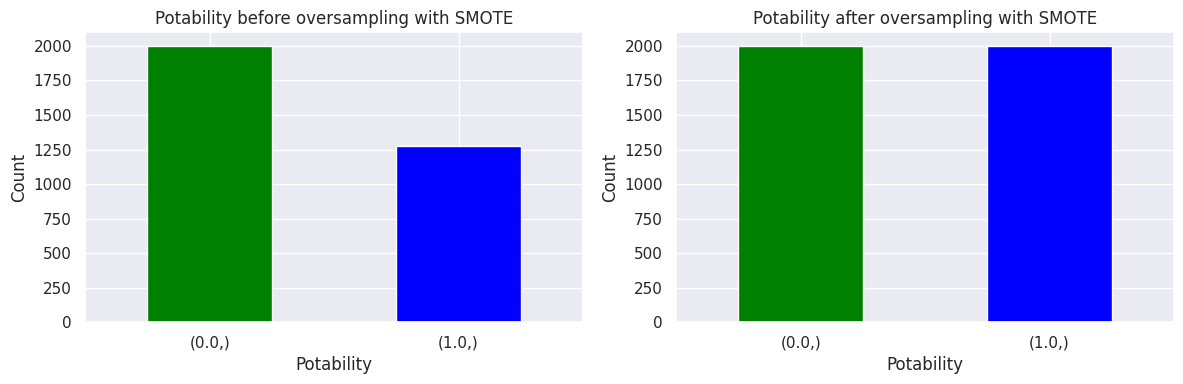

In [36]:
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title("Potability before oversampling with SMOTE")
plt.xticks(rotation=0)
plt.ylabel("Count")

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_resampled)  # Use y_resampled
new_df2.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title("Potability after oversampling with SMOTE")
plt.xticks(rotation=0)
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [38]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [39]:
print("Model Naive Bayes")
y_pred_nb = model_nb.predict(X_test)
accuracy_model_nb = round(accuracy_score(y_test, y_pred_nb), 3)
print("Accuracy : ", accuracy_model_nb)
print("Classification Report :")
print(classification_report(y_test, y_pred_nb))

Model Naive Bayes
Accuracy :  0.531
Classification Report :
              precision    recall  f1-score   support

         0.0       0.53      0.48      0.50       394
         1.0       0.53      0.58      0.56       406

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



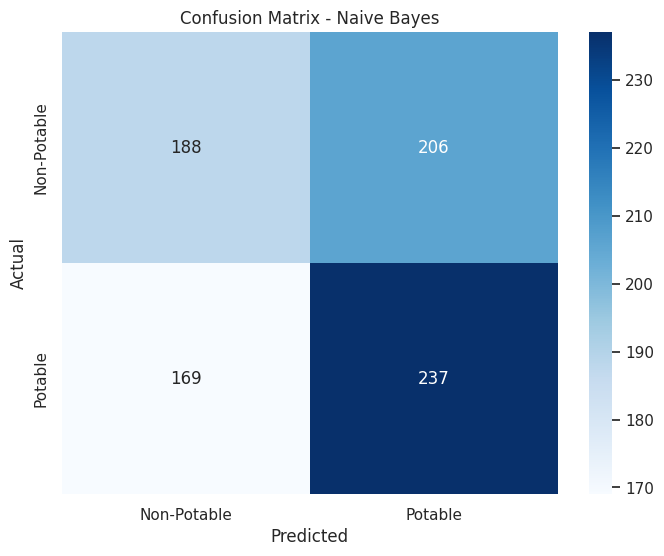

In [40]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Potable', 'Potable'],
            yticklabels=['Non-Potable', 'Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [41]:
model_dtc = DecisionTreeClassifier(random_state=1)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
print("Model Decision Tree")
y_pred_dtc = model_dtc.predict(X_test)
accuracy_model_dtc = round(accuracy_score(y_test, y_pred_dtc), 3)
print("Accuracy : ", accuracy_model_dtc)
print("Classification Report :")
print(classification_report(y_test, y_pred_dtc))

Model Decision Tree
Accuracy :  0.575
Classification Report :
              precision    recall  f1-score   support

         0.0       0.57      0.56      0.57       394
         1.0       0.58      0.59      0.58       406

    accuracy                           0.57       800
   macro avg       0.57      0.57      0.57       800
weighted avg       0.57      0.57      0.57       800



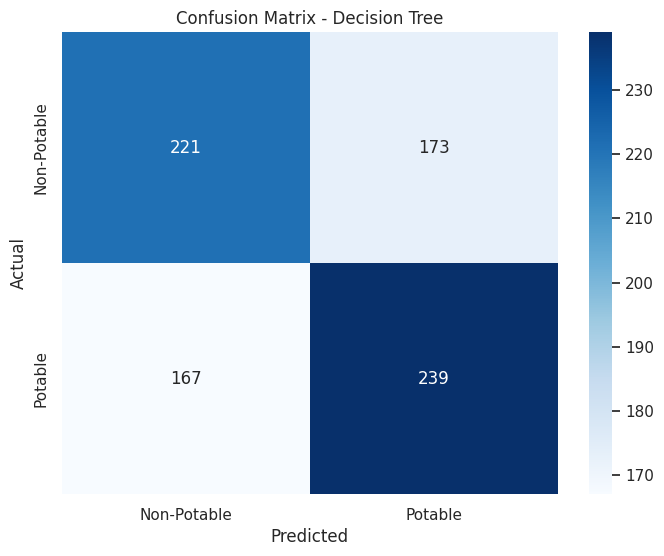

In [43]:
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Potable', 'Potable'],
            yticklabels=['Non-Potable', 'Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [44]:
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
print("Model Random Forest")
y_pred_rfc = model_rfc.predict(X_test)
accuracy_model_rfc = round(accuracy_score(y_test, y_pred_rfc), 3)
print("Accuracy : ", accuracy_model_rfc)
print("Classification Report :")
print(classification_report(y_test, y_pred_rfc))

Model Random Forest
Accuracy :  0.669
Classification Report :
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67       394
         1.0       0.68      0.65      0.67       406

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800



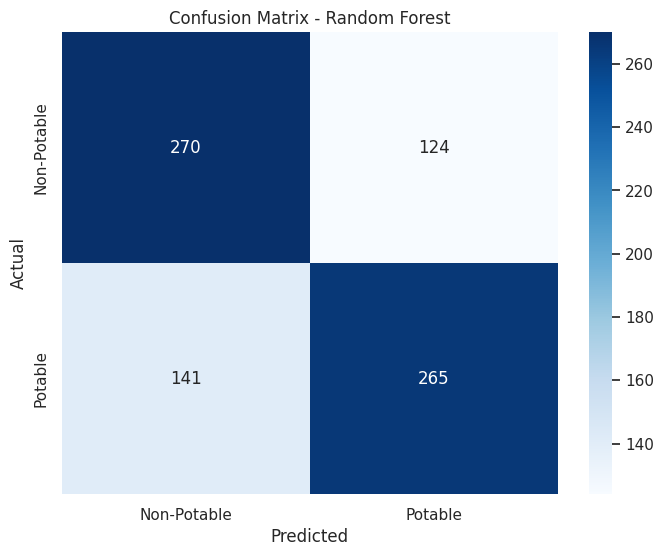

In [46]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Potable', 'Potable'],
            yticklabels=['Non-Potable', 'Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

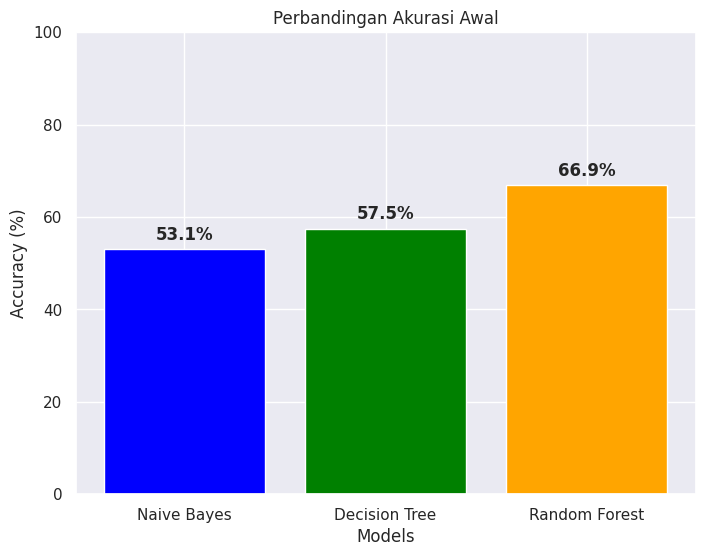

In [51]:
models = ['Naive Bayes', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_model_nb*100, accuracy_model_dtc*100, accuracy_model_rfc*100]

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Perbandingan Akurasi Awal')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 2, str(round(v,2)) + '%', ha='center', fontweight='bold')
plt.show()

### 8). Evaluasi

#### Normalisasi

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
numerical_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity']
data_iqr[numerical_features] = scaler.fit_transform(data_iqr[numerical_features])

#### Seleksi Fitur

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Inisialisasi model Logistic Regression dengan regularisasi L1
selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1), max_features=5)

# Melakukan fit pada data training
selector.fit(X_train, y_train)

# Mendapatkan fitur-fitur yang terpilih
selected_features = X_train.columns[selector.get_support()]

# Mencetak fitur-fitur yang terpilih
print("Fitur yang terpilih:", selected_features)

# Membuat dataset baru dengan fitur-fitur yang terpilih
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Fitur yang terpilih: Index(['ph', 'Chloramines', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], dtype='object')


#### Tuning Parameter

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Naive Bayes

In [96]:
nb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nb_custom = RandomizedSearchCV(
    nb,
    param_distributions=param_grid,
    n_iter=10,  # Jumlah iterasi pencarian
    cv=5,  # Jumlah fold untuk cross-validation
    verbose=2,  # Menampilkan detail proses pencarian
    random_state=42,  # Untuk reproduksibilitas
    n_jobs=-1  # Gunakan semua core prosesor
)

In [98]:
nb_custom.fit(X_train_selected, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=2)

In [99]:
print("Parameter terbaik:", nb_custom.best_params_)

Parameter terbaik: {'var_smoothing': 2.848035868435799e-08}


In [117]:
y_pred_nbT = nb_custom.predict(X_test_selected)
accuracy_nbcustom = accuracy_score(y_test, y_pred_nbT)
print(f"Akurasi hasil tuning Naive Bayes : {accuracy_nbcustom}")

Akurasi hasil tuning Naive Bayes : 0.5275


In [118]:
print("Naive Bayes - Akurasi:", accuracy_nbcustom)
print(classification_report(y_test, y_pred_nbT))

Naive Bayes - Akurasi: 0.5275
              precision    recall  f1-score   support

         0.0       0.52      0.48      0.50       394
         1.0       0.53      0.57      0.55       406

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



Decision Tree

In [101]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 40, 80],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32]
}

dt = DecisionTreeClassifier(random_state=1)
dt_custom = RandomizedSearchCV(dt, param_grid, verbose=2, n_jobs=-1)

In [102]:
dt_custom.fit(X_train_selected, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4, 8, 16,
                                                             32],
                                        'min_samples_split': [2, 5, 10, 20, 40,
                                                              80]},
                   verbose=2)

In [103]:
print("Parameter terbaik:", dt_custom.best_params_)

Parameter terbaik: {'min_samples_split': 5, 'min_samples_leaf': 32, 'max_depth': 30, 'criterion': 'gini'}


In [104]:
y_pred_dtT = dt_custom.predict(X_test_selected)
accuracy_dtcustom = accuracy_score(y_test, y_pred_dtT)
print(f"Akurasi hasil tuning Decision Tree : {accuracy_dtcustom}")

Akurasi hasil tuning Decision Tree : 0.56


In [116]:
print("Decision Tree - Akurasi:", accuracy_dtcustom)
print(classification_report(y_test, y_pred_dtT))

Decision Tree - Akurasi: 0.56
              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51       394
         1.0       0.52      0.53      0.53       406

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800



Random Forest

In [119]:
param_grid = {
    "n_estimators": [50, 100], #jumlah pohon keputusan (semakin banyak semakin akurat tapi komputasi semakin lama)
    "max_depth": [ 10, 15], # kedalaman maksimum
    "min_samples_leaf": [1, 2], # jumlah minimum sample
    "min_samples_split": [2, 5], # menentukan sample minimum untuk membagi node
    "max_features": ["sqrt", "log2"], # jumlah fitur yang digunakan dalam setiap pohon untuk mencari split terbaik.
}

rf = RandomForestClassifier(random_state=42)
rf_custom = RandomizedSearchCV(rf, param_grid, n_iter=3, cv=5, n_jobs=-1)

In [120]:
rf_custom.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]})

In [123]:
y_pred_rfT = rf_custom.predict(X_test)
accuracy_rfcustom = accuracy_score(y_test, y_pred_rfT)
print(f"Akurasi hasil tuning Random Forest: {accuracy_rfcustom}")

Akurasi hasil tuning Random Forest: 0.67125


In [124]:
print("Random Forest - Akurasi:", accuracy_rfcustom)
print(classification_report(y_test, y_pred_rfT))

Random Forest - Akurasi: 0.67125
              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66       394
         1.0       0.67      0.69      0.68       406

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800



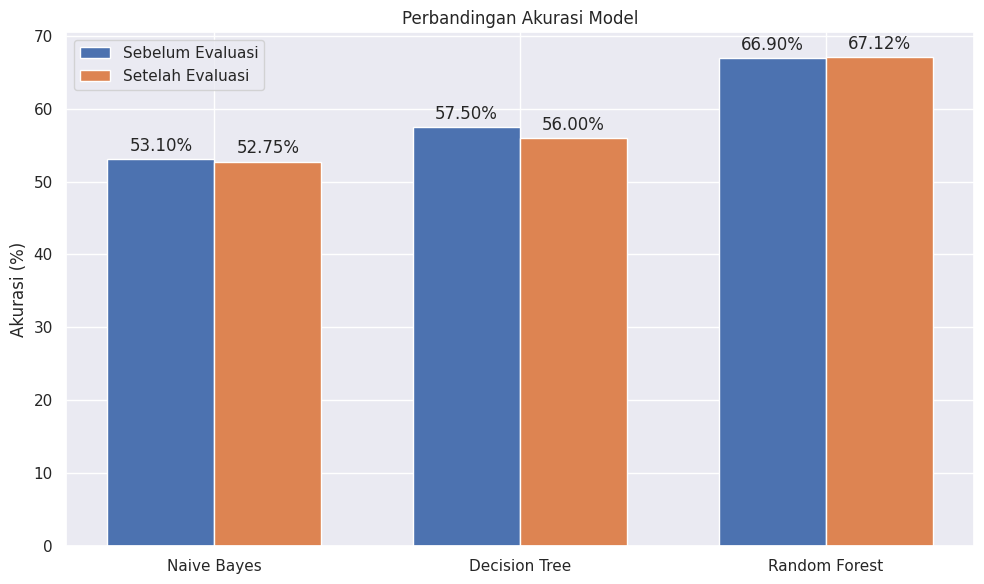

In [126]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Decision Tree', 'Random Forest']
initial_accuracies = [accuracy_model_nb*100, accuracy_model_dtc*100, accuracy_model_rfc*100]
tuned_accuracies = [accuracy_nbcustom*100, accuracy_dtcustom*100, accuracy_rfcustom*100]

x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, initial_accuracies, width, label='Sebelum Evaluasi')
rects2 = ax.bar([i + width for i in x], tuned_accuracies, width, label='Setelah Evaluasi')

ax.set_ylabel('Akurasi (%)')
ax.set_title('Perbandingan Akurasi Model')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)
ax.legend()

# Menambahkan label nilai di atas setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [128]:
print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy:.2f}%")

Best Model: Random Forest
Best Accuracy: 67.12%


### 9). Deployment

### 10). Kesimpulan

*   **Tingkat Akurasi 3 Model Algoritma**

    1. Naive Bayes sebelum proses evaluasi 53,10% setelah evaluasi menjadi 52,75%
    2. Decision Tree sebelum proses evaluasi 57,50% setelah proses evaluasi menjadi 56%
    3. Random Forest sebelum evaluasi 66,90% setelah evaluasi menjadi 67,12%
*   **Keunggulan dan Keterbatasan setiap Algoritma**
    1. Naive Bayes
      - Kelebihan  : Sederhana, cepat, dan efektif untuk dataset berdimensi tinggi. Cocok untuk masalah klasifikasi biner dan multi-kelas.
      - Kekurangan : Asumsi independensi antar fitur mungkin tidak realistis di dunia nyata. Performa dapat menurun jika terdapat fitur yang berkorelasi kuat.
    2. Decision Tree
      - Kelebihan  : Mudah diinterpretasi dan divisualisasikan. Dapat menangani data numerik dan kategorikal. Tidak sensitif terhadap outlier.
      - Kekurangan : Rentan terhadap overfitting, terutama jika pohon keputusan terlalu dalam. Perubahan kecil pada data dapat menghasilkan pohon keputusan yang berbeda.
    3. Random Forest
      - Kelebihan  : Mengatasi overfitting pada Decision Tree dengan menggabungkan beberapa pohon keputusan. Performa tinggi dan robust.
      - Kekurangan : Lebih kompleks dan membutuhkan waktu pelatihan yang lebih lama dibandingkan Decision Tree. Interpretasi model lebih sulit.
*   **Rekomendasi Algoritma yang paling efektif beserta alasannya**
    - Berdasarkan hasil analisis, algoritma Random Forest paling efektif daripada Naive Bayes dan Decision Tree untuk klasifikasi data kualitas air dan kelayakan minum. Hal ini didasarkan pada :    
      - Random Forest memiliki Akurasi Tertinggi yaitu mencapai 67,12%
      - Random Forest cenderung lebih robust terhadap noise dan outlier pada data
      - Random Forest memiliki generalisasi data yang baik untuk menjaga performa ketika ada data yang baru